<a href="https://colab.research.google.com/github/bhuvan-webknot/AIML-Assignment-1/blob/main/Day1_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Import the dataset
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

In [52]:
#Try to display first and last 5 values in the dataset
df.head(5)
# df.tail(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
#Name labels 'positive' for rating value > 3 and 'negative' for <= 3

df1=df.copy(False)
df1['Rating Label']=np.where(df['Rating'] > 3, 'positive', 'negative')
df1.head()

,Review,Rating,Rating Label
0,nice hotel expensive parking got good deal sta...,4,positive
1,ok nothing special charge diamond member hilto...,2,negative
2,nice rooms not 4* experience hotel monaco seat...,3,negative
3,"unique, great stay, wonderful time hotel monac...",5,positive
4,"great stay great stay, went seahawk game aweso...",5,positive


In [6]:
#Calculate the lengths of each record in 'review' column and add to the dataframe
df1['Letter Count'] = df1['Review'].apply(lambda x : len(x))

#Calculate the number of words in 'review' column and add to the dataframe
df1['Word Count'] = df1['Review'].apply(lambda x: len(x.split()))

#Calculate the average length of word for each record in 'review' column and add to the dataframe
df1['Average'] = df1['Letter Count']/df1['Word Count']
df1['Average'] = df1['Average'].round(3)

#Calculate the average sentence length of the sentences in the 'review' and add to the dataframe
df1['Avg_sentence_len']=df1['Review'].apply(lambda x:len(x.split()))/df1['Review'].apply(lambda x:len(x.split(".")))
df1.head()

,Review,Rating,Rating Label,Letter Count,Word Count,Average,Avg_sentence_len
0,nice hotel expensive parking got good deal sta...,4,positive,593,87,6.816,87.000
1,ok nothing special charge diamond member hilto...,2,negative,1689,250,6.756,50.000
2,nice rooms not 4* experience hotel monaco seat...,3,negative,1427,217,6.576,27.125
3,"unique, great stay, wonderful time hotel monac...",5,positive,600,89,6.742,89.000
4,"great stay great stay, went seahawk game aweso...",5,positive,1281,191,6.707,95.500


<BarContainer object of 20491 artists>

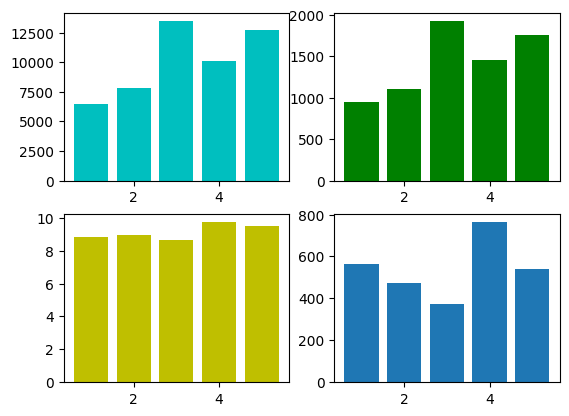

In [33]:
#Visualise each of the columns with respect to the 'Rating' column

import matplotlib.pyplot as plt
plt.subplot(2, 2, 1)
plt.bar(df1['Rating'],df1['Letter Count'],color='c')

plt.subplot(2, 2, 2)
plt.bar(df1['Rating'],df1['Word Count'],color='g')

plt.subplot(2, 2, 3)
plt.bar(df1['Rating'],df1['Average'],color='y')

plt.subplot(2, 2, 4)
plt.bar(df1['Rating'],df1['Avg_sentence_len'])

###Compute term frequency analysis on the 'review' column

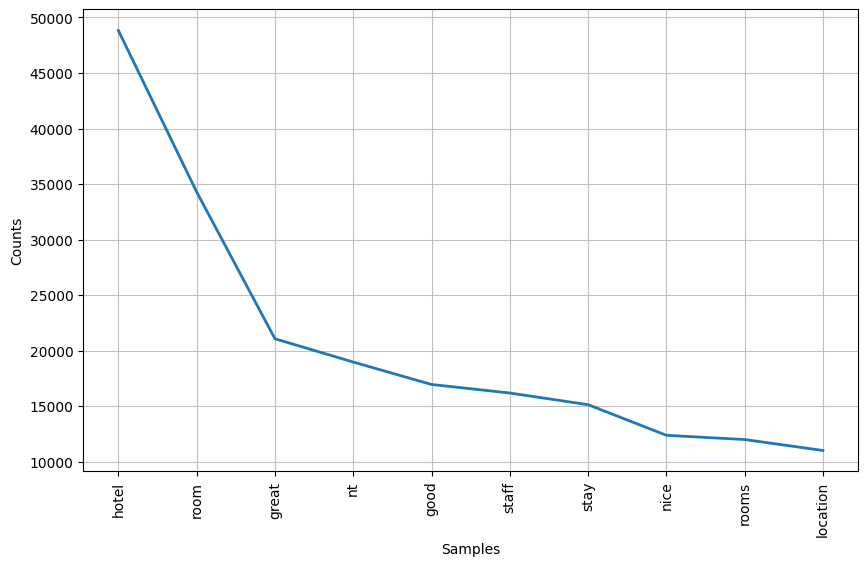

In [32]:
import re
import string
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt

#Preprocess to lowercase
df2=df.copy(False)
df2["Review"] = df2["Review"].apply(lambda x : x.lower())

#Remove Punctuations
df2["Review"] = df2["Review"].apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))
df2.head()

#Stopwords
stop_words = set(stopwords.words('english'))

df2["Review"] = df2["Review"].apply(lambda x : ' '.join([w for w in word_tokenize(x) if w not in stop_words]))
df2["Review_list"]=df2["Review"].apply(lambda x : x.split())

df2.head()


#Identify most common words using 'Review_lists' column
all_the_words = [word for sublist in df2['Review_list'] for word in sublist]
freq = FreqDist(all_the_words)

plt.figure(figsize=(10, 6))
freq.plot(10, cumulative=False)

plt.show()